<a href="https://colab.research.google.com/github/Borhanuddin672012/Project/blob/main/Final_Project2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import numpy as np
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
from pandas import to_datetime
from pandas_profiling import ProfileReport
from matplotlib import pyplot


In [ ]:
df = pd.read_excel("Transaction (1).xls")


In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
df.head()

,Transaction Date,Customer Code,Transaction Type,Transaction Nature,CUSTOMER_NAME,Transaction Amount,REMARK
0,2020-12-01,60134000064,IT,INTER BRANCH TRANSFERS,MD ALA UDDIN,11875.0,Salary & Allowances Novembe-2020
1,2020-12-01,60134001874,IT,INTER BRANCH TRANSFERS,MD. MAHABUB HASAN,11875.0,Salary & Allowances Novembe-2020
2,2020-12-01,60134002200,IT,INTER BRANCH TRANSFERS,MD. DELOWAR HOSSAIN,22000.0,Salary & Allowances Novembe-2020
3,2020-12-01,60134002246,IT,INTER BRANCH TRANSFERS,ISRAFIL BHUIYAN,9050.0,Salary & Allowances Novembe-2020
4,2020-12-01,60134002767,IT,INTER BRANCH TRANSFERS,MD AWOLAD HOSSAIN,8900.0,Salary & Allowances Novembe-2020


In [ ]:
features_cleaning = df.drop(['Transaction Type','Customer Code','CUSTOMER_NAME','REMARK'], axis=1)


In [ ]:
features_cleaning.shape

(64514, 3)

In [ ]:
features_cleaning.columns

Index(['Transaction Date', 'Transaction Nature', 'Transaction Amount'], dtype='object')

In [ ]:
features_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64514 entries, 0 to 64513
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction Date    64514 non-null  datetime64[ns]
 1   Transaction Nature  63894 non-null  object        
 2   Transaction Amount  64514 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
#df['purchase'].astype(str).astype(int)
#df["a"] = df["a"].astype(str).astype(int)
#drinks['beer_servings'] = drinks.beer_servings.astype(float)
#df['DataFrame Column'] = df['DataFrame Column'].astype(int)
#df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'])
#df.astype('int32').dtypes
#df.astype({'col1': 'int32'}).dtypes
#df['purchase'].astype(str).astype(int)
#df["a"] = df["a"].astype(str).astype(float)

#features_cleaning["Customer Code "]=features_cleaning["Customer Code "].astype(str).astype(int)
#features_cleaning["Customer Code"] = features_cleaning.Customer code .astype(int)
#features_cleaning['Customer Code'] = features_cleaning['Customer Code'].astype(int)
#features_cleaning['Customer Code']= pd.to_numeric(features_cleaning['Customer Code'])
#features_cleaning.astype({'Customer Code' : 'int32'}).dtypes
#features_cleaning['Customer Code'].astype(str).astype(int)
#features_cleaning['Customer Code'] =features_cleaning['Customer Code'].astype(str).astype(int)

# **Pandas Drop Duplicates**
Removing duplicates is an essential skill to get accurate counts because you often don't want to count the same thing multiple times. In Python, this could be accomplished by using the Pandas module, which has a method known as drop_duplicates.

# **Dropping Duplicate Names**
Let's say you have a dataframe that contains vet visits, and the vet's office wants to know how many dogs of each breed have visited their office. However, there are dogs like Max and Stella, who have visited the vet more than once in your dataset. Hence, you cannot just count the number of each breed in the breed column.

You would do this using the **drop_duplicates** method. It takes an argument **subset**, which is the column we want to find or duplicates based on - in this case, we want all the unique names.

**vet_visits.drop_duplicates(subset="name") **

In [ ]:
Remove_duplicates =features_cleaning.drop_duplicates(subset=["Transaction Date","Transaction Nature","Transaction Amount"])
Remove_duplicates.head()

,Transaction Date,Transaction Nature,Transaction Amount
0,2020-12-01,INTER BRANCH TRANSFERS,11875.0
2,2020-12-01,INTER BRANCH TRANSFERS,22000.0
3,2020-12-01,INTER BRANCH TRANSFERS,9050.0
4,2020-12-01,INTER BRANCH TRANSFERS,8900.0
5,2020-12-01,INTER BRANCH TRANSFERS,8750.0


In [ ]:
Remove_duplicates.shape

(51963, 3)

In [ ]:
Remove_duplicates.isnull().sum()

Transaction Date        0
Transaction Nature    491
Transaction Amount      0
dtype: int64

In [ ]:
Row_Cleanig = Remove_duplicates.dropna()


In [ ]:
Row_Cleanig.shape

(51472, 3)

In [ ]:
Row_Cleanig.isnull().sum()

Transaction Date      0
Transaction Nature    0
Transaction Amount    0
dtype: int64

In [ ]:
Row_copy = Row_Cleanig.copy()
Row_copy.head()

,Transaction Date,Transaction Nature,Transaction Amount
0,2020-12-01,INTER BRANCH TRANSFERS,11875.0
2,2020-12-01,INTER BRANCH TRANSFERS,22000.0
3,2020-12-01,INTER BRANCH TRANSFERS,9050.0
4,2020-12-01,INTER BRANCH TRANSFERS,8900.0
5,2020-12-01,INTER BRANCH TRANSFERS,8750.0


In [ ]:
Row_copy.columns = ['ds','Transaction Nature','y']
Row_copy.head()

,ds,Transaction Nature,y
0,2020-12-01,INTER BRANCH TRANSFERS,11875.0
2,2020-12-01,INTER BRANCH TRANSFERS,22000.0
3,2020-12-01,INTER BRANCH TRANSFERS,9050.0
4,2020-12-01,INTER BRANCH TRANSFERS,8900.0
5,2020-12-01,INTER BRANCH TRANSFERS,8750.0


# **One-Hot encoding**
The basic strategy is to convert each category value into a new column and assign a **1** or **0** (True/False) value to the column. This has the benefit of not weighting a value improperly.

There are many libraries out there that support one-hot encoding but the simplest one is using **pandas**' .**get_dummies()** method.

This function is named this way because it creates dummy/indicator variables (1 or 0). There are mainly three arguments important here, the first one is the DataFrame you want to encode on, **second** being the columns argument which lets you specify the columns you want to do encoding on, and third, the prefix argument which lets you specify the prefix for the new **columns** that will be created after encoding.

cat_df_flights_onehot = cat_df_flights.copy()
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

print(cat_df_flights_onehot.head())

In [ ]:
dummy_df = pd.get_dummies(Row_copy)
dummy_df.head()

,ds,y,Transaction Nature_ATM TRANSACTION,Transaction Nature_BEFTN INWARD,Transaction Nature_BEFTN OUTWARD,Transaction Nature_BKASH,Transaction Nature_CASH,Transaction Nature_FESTIVAL BONUS TRANS. TYPE FROM ORBITS,Transaction Nature_GENERAL,Transaction Nature_INTER BRANCH CASH,Transaction Nature_INTER BRANCH CASH (I BRANCH),Transaction Nature_INTER BRANCH TRANSFERS,Transaction Nature_INTEREST,Transaction Nature_LINK ACCOUNT TRANSFER,Transaction Nature_MICR OUTWARD CLEARING,Transaction Nature_RTGS INWARD,Transaction Nature_TRANSFER,Transaction Nature_WEB TRANSACTION,Transaction Nature_WESTERN UNION MONEY TRANSFER
0,2020-12-01,11875.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2020-12-01,22000.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2020-12-01,9050.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2020-12-01,8900.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,2020-12-01,8750.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
dummy_df.columns

Index(['ds', 'y', 'Transaction Nature_ATM TRANSACTION',
       'Transaction Nature_BEFTN INWARD', 'Transaction Nature_BEFTN OUTWARD',
       'Transaction Nature_BKASH', 'Transaction Nature_CASH',
       'Transaction Nature_FESTIVAL BONUS TRANS. TYPE FROM ORBITS',
       'Transaction Nature_GENERAL', 'Transaction Nature_INTER BRANCH CASH',
       'Transaction Nature_INTER BRANCH CASH (I BRANCH)',
       'Transaction Nature_INTER BRANCH TRANSFERS',
       'Transaction Nature_INTEREST',
       'Transaction Nature_LINK ACCOUNT TRANSFER',
       'Transaction Nature_MICR OUTWARD CLEARING',
       'Transaction Nature_RTGS INWARD', 'Transaction Nature_TRANSFER',
       'Transaction Nature_WEB TRANSACTION',
       'Transaction Nature_WESTERN UNION MONEY TRANSFER'],
      dtype='object')

In [ ]:
#Final_Cleanig_Prophet.to_csv('Final.csv')
dummy_df.to_csv('Dummy.csv')

In [ ]:
Final_Cleanig_Prophet = Row_Cleanig.drop(['Transaction Nature'], axis=1)

In [ ]:
Final_Cleanig_Prophet.isnull().sum()

Transaction Date      0
Transaction Amount    0
dtype: int64

In [ ]:
Final_Cleanig_Prophet.shape

(51472, 2)

In [ ]:
Final_Cleanig_Prophet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51472 entries, 0 to 64513
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction Date    51472 non-null  datetime64[ns]
 1   Transaction Amount  51472 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 MB


In [ ]:
Final_Cleanig_Prophet.to_csv('Final.csv')

In [ ]:
df2 = pd.read_csv("Final.csv")
df2.head()

,Unnamed: 0,Transaction Date,Transaction Amount
0,0,2020-12-01,11875.0
1,2,2020-12-01,22000.0
2,3,2020-12-01,9050.0
3,4,2020-12-01,8900.0
4,5,2020-12-01,8750.0


In [ ]:
df2.drop(df2.columns[df2.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
df2.head()


,Transaction Date,Transaction Amount
0,2020-12-01,11875.0
1,2020-12-01,22000.0
2,2020-12-01,9050.0
3,2020-12-01,8900.0
4,2020-12-01,8750.0


In [ ]:
df2.tail()

,Transaction Date,Transaction Amount
51467,2020-03-04,65000.0
51468,2020-03-04,8000.0
51469,2020-03-04,214942.0
51470,2020-03-05,500.0
51471,2020-03-05,10000.0


In [ ]:
#df2['Year'] = df2['Transaction Date'].apply(lambda x: str(x)[:-6])
#df2['Month'] = df2['Transaction Date'].apply(lambda x : str(x)[-4:-3])
#df2['Day']  = df2['Transaction Date'].apply(lambda x: str(x)[:-6])
#df2['ds'] = pd.DataFrame(df2['Year'] + '-' +df2['Month'] + '-' + df2['Day'] )


In [ ]:
df2['Transaction Date'] = pd.DatetimeIndex(df2['Transaction Date'])


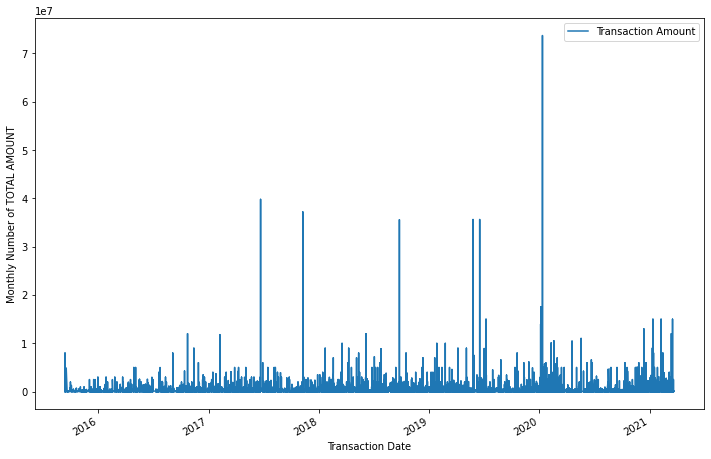

In [ ]:
ax = df2.set_index('Transaction Date').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of TOTAL AMOUNT')
ax.set_xlabel('Transaction Date')

plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
#Features of Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [ ]:
#Initialize the Model
model = Prophet()

Parameters


*   Growth

*   Seasonality : additive/ multiplicative


*   holidays
*   Change point





In [ ]:
df2.columns

Index(['Transaction Date', 'Transaction Amount'], dtype='object')

In [ ]:
#Work with a ds and y column names
#df2.rename(columns={'Transaction Date' : 'ds','Transaction Amount':'y'})
df2.columns = ['ds','y']
df2.head()

,ds,y
0,2020-12-01,11875.0
1,2020-12-01,22000.0
2,2020-12-01,9050.0
3,2020-12-01,8900.0
4,2020-12-01,8750.0


In [ ]:
df2.head()

,ds,y
0,2020-12-01,11875.0
1,2020-12-01,22000.0
2,2020-12-01,9050.0
3,2020-12-01,8900.0
4,2020-12-01,8750.0


In [ ]:
df2.tail()


,ds,y
51467,2020-03-04,65000.0
51468,2020-03-04,8000.0
51469,2020-03-04,214942.0
51470,2020-03-05,500.0
51471,2020-03-05,10000.0


In [ ]:
df2.to_csv("Report.csv")

# **Sub-daily data of hours**

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


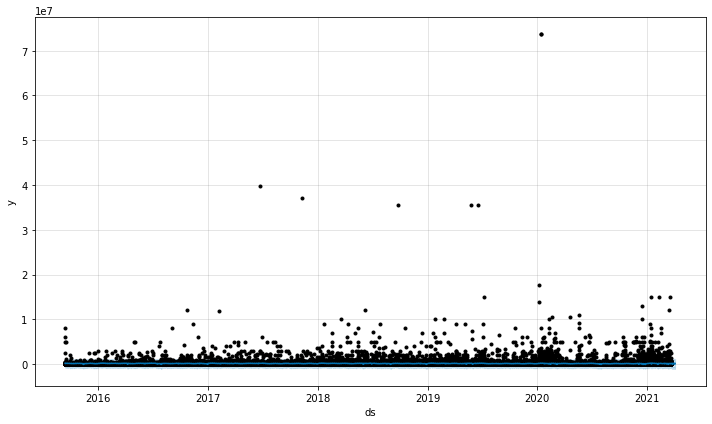

In [ ]:
#Model_of_hours = Prophet(changepoint_prior_scale=.5).fit(df2)
Model_of_hours = Prophet(changepoint_prior_scale=0.01).fit(df2)
futures_of_hours = Model_of_hours.make_future_dataframe(periods=300, freq='H')
forcasting = Model_of_hours.predict(futures_of_hours)
fig = Model_of_hours.plot(forcasting)

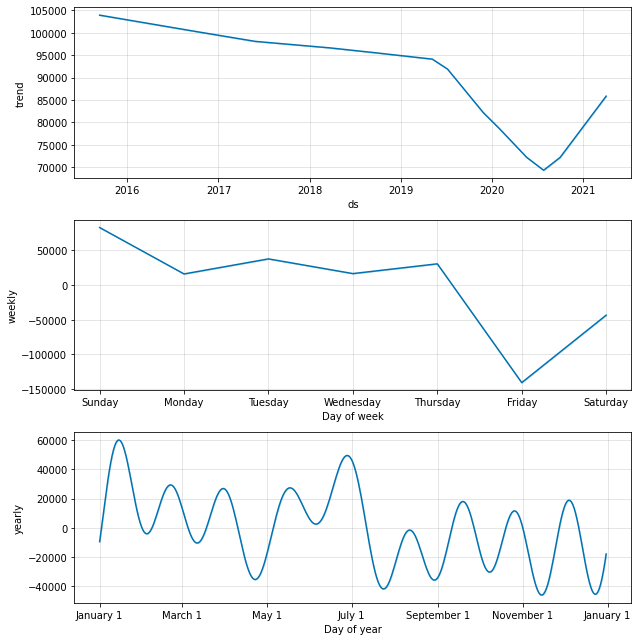

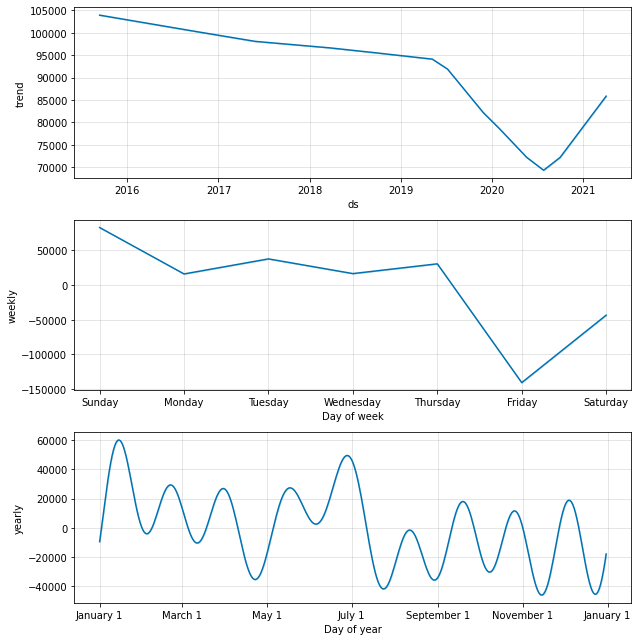

In [ ]:
fig= Model_of_hours.plot_components(forcasting)
fig

**Data with regular gaps**

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


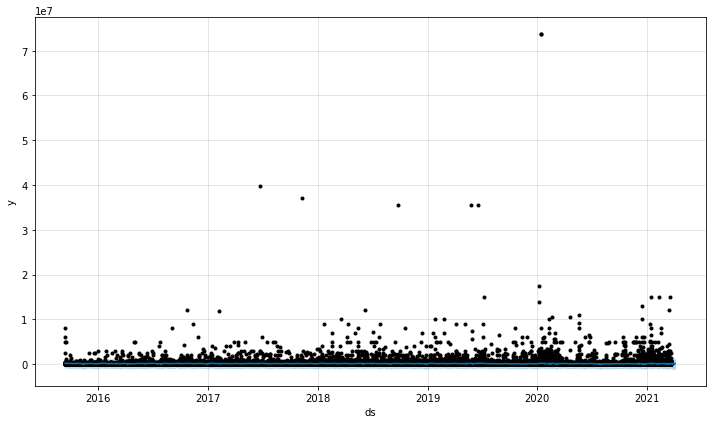

In [ ]:
df3 = df2.copy()
df3['ds'] = pd.to_datetime(df3['ds'])
df3 = df3[df3['ds'].dt.hour < 6]
m = Prophet().fit(df3)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

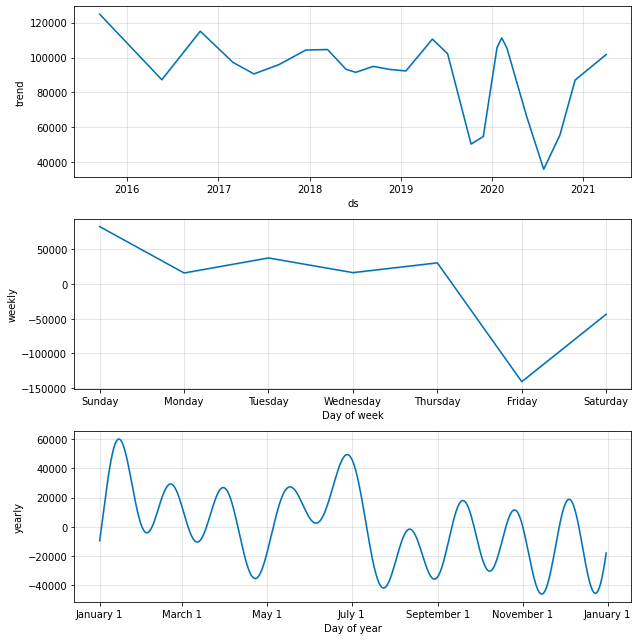

In [ ]:
fig= Model_of_hours.plot_components(fcst)

In [ ]:
df2 = df2[1:]
df2.head()

,ds,y
1,2020-12-01,22000.0
2,2020-12-01,9050.0
3,2020-12-01,8900.0
4,2020-12-01,8750.0
5,2020-12-01,8700.0


# **Train Model**

In [ ]:
M = Prophet(interval_width=0.95, daily_seasonality=True)
model = M.fit(df2) 

# **Forecast Away Sub-daily data of Daily**

In [ ]:
Modelo_of_daily = M.make_future_dataframe(periods=100, freq='D')
forcast = M.predict(Modelo_of_daily )
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-09-13,19382.058467,-1.376994e+06,1.632187e+06,19382.058467,19382.058467,165005.888386,165005.888386,165005.888386,76728.260163,76728.260163,76728.260163,82492.655712,82492.655712,82492.655712,5784.972511,5784.972511,5784.972511,0.0,0.0,0.0,184387.946853
1,2015-09-14,19403.490354,-1.267740e+06,1.588358e+06,19403.490354,19403.490354,101381.346671,101381.346671,101381.346671,76728.260163,76728.260163,76728.260163,15493.907051,15493.907051,15493.907051,9159.179457,9159.179457,9159.179457,0.0,0.0,0.0,120784.837026
2,2015-09-15,19424.922242,-1.372923e+06,1.559979e+06,19424.922242,19424.922242,126077.658449,126077.658449,126077.658449,76728.260163,76728.260163,76728.260163,37239.765632,37239.765632,37239.765632,12109.632654,12109.632654,12109.632654,0.0,0.0,0.0,145502.580691
3,2015-09-16,19446.354129,-1.400807e+06,1.517494e+06,19446.354129,19446.354129,107248.796218,107248.796218,107248.796218,76728.260163,76728.260163,76728.260163,15957.303577,15957.303577,15957.303577,14563.232479,14563.232479,14563.232479,0.0,0.0,0.0,126695.150347
4,2015-09-17,19467.786016,-1.358846e+06,1.549680e+06,19467.786016,19467.786016,123300.102515,123300.102515,123300.102515,76728.260163,76728.260163,76728.260163,30112.644628,30112.644628,30112.644628,16459.197724,16459.197724,16459.197724,0.0,0.0,0.0,142767.888532


In [ ]:
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1489,2021-06-26,18097.613094,-1.347885e+06,1.618138e+06,14126.759757,21500.448316,85702.050264,85702.050264,85702.050264,76728.260163,76728.260163,76728.260163,-39433.847727,-39433.847727,-39433.847727,48407.637828,48407.637828,48407.637828,0.0,0.0,0.0,103799.663358
1490,2021-06-27,18181.801086,-1.209424e+06,1.609935e+06,14164.140671,21628.588993,208391.636949,208391.636949,208391.636949,76728.260163,76728.260163,76728.260163,82492.655712,82492.655712,82492.655712,49170.721074,49170.721074,49170.721074,0.0,0.0,0.0,226573.438036
1491,2021-06-28,18265.989078,-1.390147e+06,1.557527e+06,14202.001816,21756.729669,141613.960026,141613.960026,141613.960026,76728.260163,76728.260163,76728.260163,15493.907051,15493.907051,15493.907051,49391.792811,49391.792811,49391.792811,0.0,0.0,0.0,159879.949104
1492,2021-06-29,18350.177070,-1.268096e+06,1.753093e+06,14239.862960,21884.870346,163011.129652,163011.129652,163011.129652,76728.260163,76728.260163,76728.260163,37239.765632,37239.765632,37239.765632,49043.103856,49043.103856,49043.103856,0.0,0.0,0.0,181361.306722
1493,2021-06-30,18434.365062,-1.283661e+06,1.708899e+06,14277.724104,22013.011023,140792.239922,140792.239922,140792.239922,76728.260163,76728.260163,76728.260163,15957.303577,15957.303577,15957.303577,48106.676182,48106.676182,48106.676182,0.0,0.0,0.0,159226.604984


In [ ]:
plot1 =M.plot(forcast)

NameError: ignored

In [ ]:
forcast.to_csv("Forecast_of_Daily.csv")

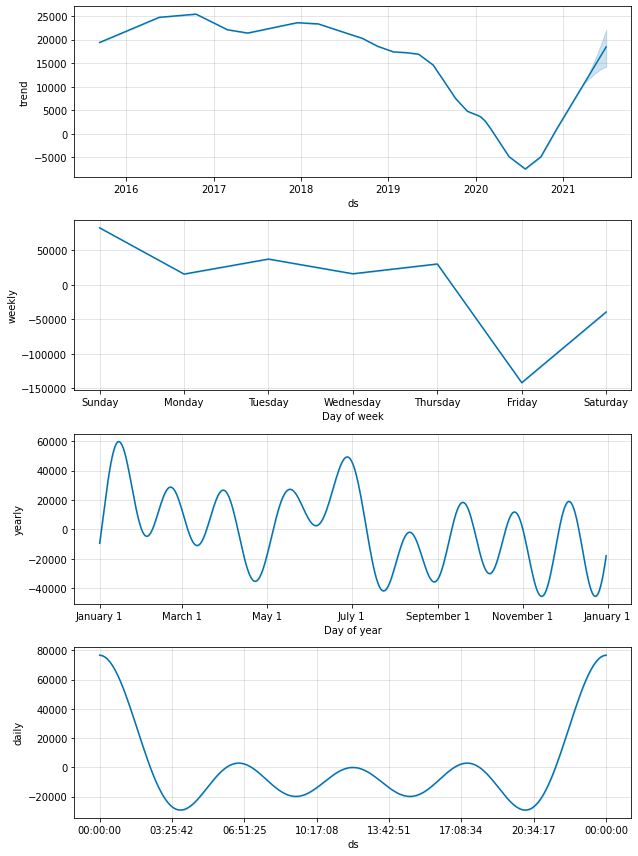

In [ ]:
plot2 = M.plot_components(forcast)

# **Forecast Away of Monthly data**

You can use Prophet to fit monthly data. However, the underlying model is continuous-time, which means that you can get strange results if you fit the model to monthly data and then ask for daily forecasts. Here we forecast US retail sales volume for the next 2years:

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


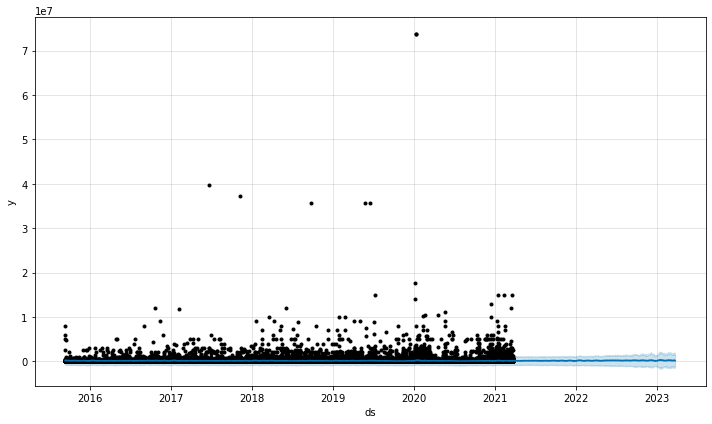

In [ ]:
m = Prophet(seasonality_mode='multiplicative').fit(df2)
future = m.make_future_dataframe(periods=730)
fcst2 = m.predict(future)
fig = m.plot(fcst2)

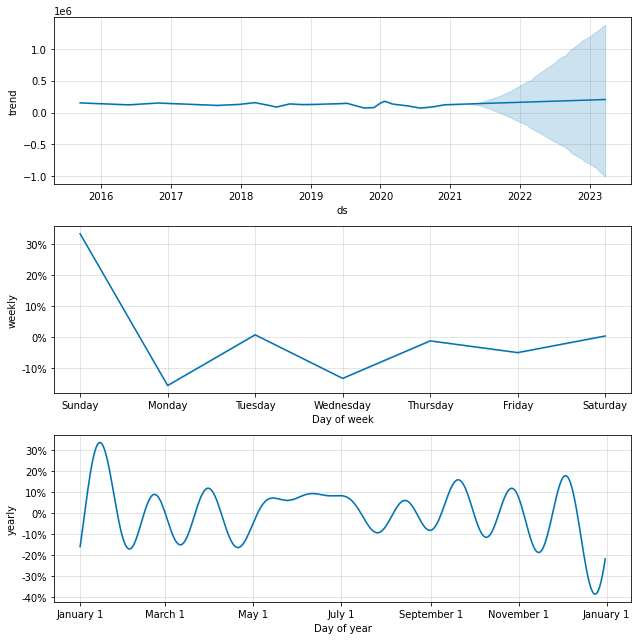

In [ ]:
plot_Monthly = m.plot_components(fcst2)

In [ ]:
#Create Future Dates of 365 days
#Future_dates = model.make_future_dataframe(periods=365)
Future_dates2 = model.make_future_dataframe(periods=730)

In [ ]:
#Shape of Dataset
Future_dates2.shape


(2124, 1)

In [ ]:
Future_dates2.head()

,ds
0,2015-09-13
1,2015-09-14
2,2015-09-15
3,2015-09-16
4,2015-09-17


In [ ]:
Future_dates2.tail()

,ds
2119,2023-03-18
2120,2023-03-19
2121,2023-03-20
2122,2023-03-21
2123,2023-03-22


In [ ]:
#make Prediction with model
prediction = model.predict(Future_dates2)
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2119,2023-03-18,104758.368159,-1.364106e+06,1.695785e+06
2120,2023-03-19,229393.043743,-1.179676e+06,1.797033e+06
2121,2023-03-20,165351.208590,-1.334525e+06,1.649405e+06
2122,2023-03-21,190224.143987,-1.423422e+06,1.545370e+06
2123,2023-03-22,172155.745605,-1.311768e+06,1.633871e+06


In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-09-13,19382.058467,-1.330890e+06,1.635582e+06,19382.058467,19382.058467,165005.888386,165005.888386,165005.888386,76728.260163,76728.260163,76728.260163,82492.655712,82492.655712,82492.655712,5784.972511,5784.972511,5784.972511,0.0,0.0,0.0,184387.946853
1,2015-09-14,19403.490354,-1.308156e+06,1.630648e+06,19403.490354,19403.490354,101381.346671,101381.346671,101381.346671,76728.260163,76728.260163,76728.260163,15493.907051,15493.907051,15493.907051,9159.179457,9159.179457,9159.179457,0.0,0.0,0.0,120784.837026
2,2015-09-15,19424.922242,-1.262787e+06,1.586611e+06,19424.922242,19424.922242,126077.658449,126077.658449,126077.658449,76728.260163,76728.260163,76728.260163,37239.765632,37239.765632,37239.765632,12109.632654,12109.632654,12109.632654,0.0,0.0,0.0,145502.580691
3,2015-09-16,19446.354129,-1.413155e+06,1.604254e+06,19446.354129,19446.354129,107248.796218,107248.796218,107248.796218,76728.260163,76728.260163,76728.260163,15957.303577,15957.303577,15957.303577,14563.232479,14563.232479,14563.232479,0.0,0.0,0.0,126695.150347
4,2015-09-17,19467.786016,-1.384809e+06,1.671274e+06,19467.786016,19467.786016,123300.102515,123300.102515,123300.102515,76728.260163,76728.260163,76728.260163,30112.644628,30112.644628,30112.644628,16459.197724,16459.197724,16459.197724,0.0,0.0,0.0,142767.888532


Narrative



*   yhat : the predicted forcast

*   yhat_lower : The lower border of the prediction
*   yhat_upper : the upper border of the prediction






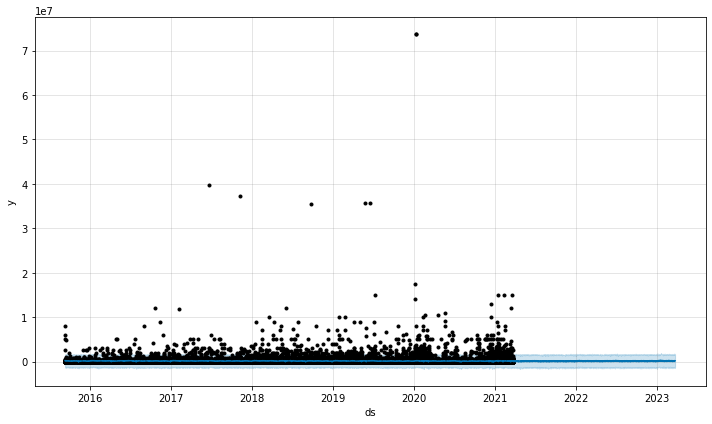

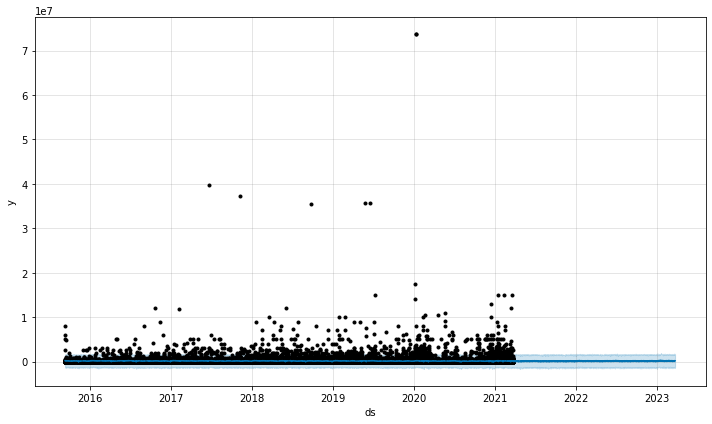

In [ ]:
#plot our Predictions
model.plot(prediction)

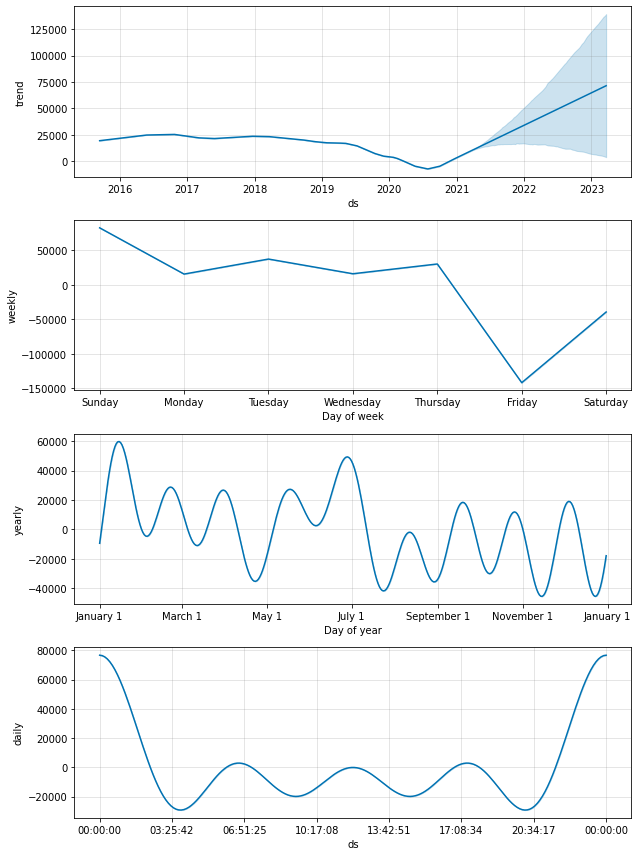

In [ ]:
# Python
fig2 = model.plot_components(prediction)


In [ ]:
prediction.to_csv('Forecast_of_Year.csv')

Narrative

1) A trending data

2) Black dots : the actual data points in our data set

3) Deep blue line :The predicted forcast / the predicted values

4) Light blue line : the boundaries

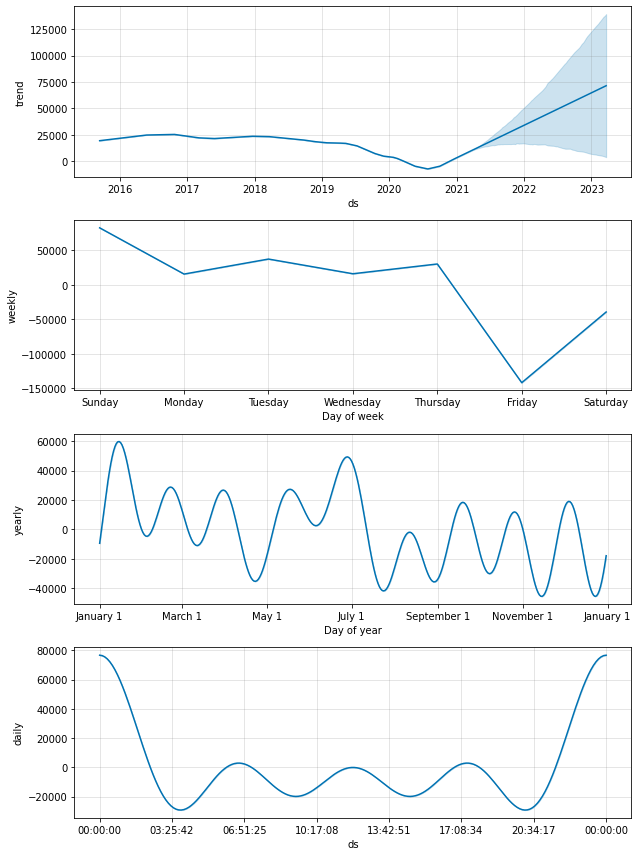

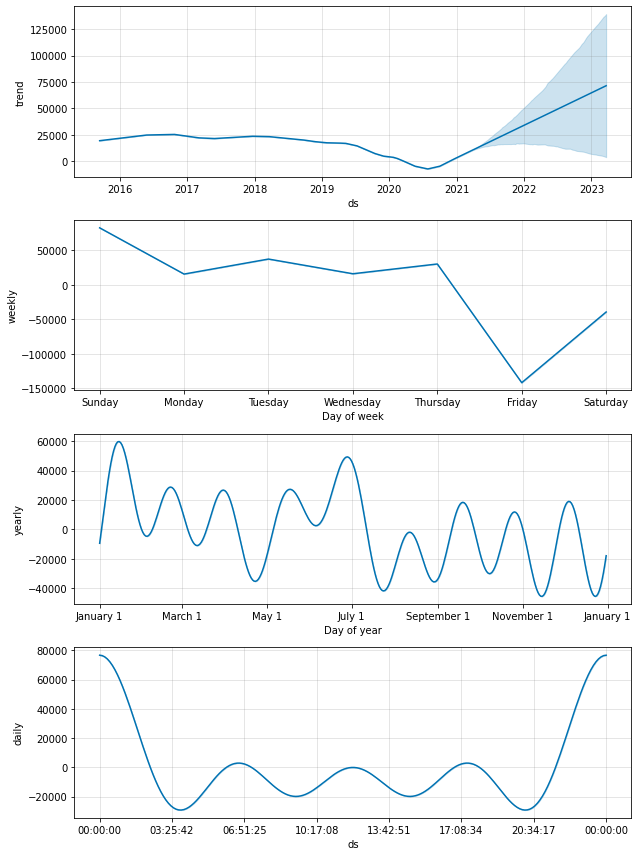

In [ ]:
# Visualize Each Component [Trends, Weekly]
model.plot_components(prediction)

Cross Validation
* For measuring forecasting error by comparing the predicted values with the actual values
* initial : the size of the initial traning period
* period : The spacing between cutoff dates
* horizon : The forecast horizon( ds minus cutoff)
* By default , the initial trainig period is set to three times the horizon, and cutoff are made every half a horizon 

In [ ]:
from fbprophet.diagnostics import cross_validation


In [ ]:
#Future_dates.head()
df2.shape

(51471, 2)

In [ ]:
CV = cross_validation(model, initial= '1095', period= '180 days', horizon='365 days')

INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-10-15 00:00:00 and 2020-03-22 00:00:00


In [ ]:
CV.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-10-18,-31091.72358,-1.908700e+06,1.879593e+06,15000.0,2015-10-15
1,2015-10-18,-31091.72358,-2.054075e+06,1.726430e+06,50000.0,2015-10-15
2,2015-10-18,-31091.72358,-1.908052e+06,1.919388e+06,2000.0,2015-10-15
3,2015-10-18,-31091.72358,-1.965881e+06,1.913395e+06,16000.0,2015-10-15
4,2015-10-18,-31091.72358,-2.050381e+06,1.804158e+06,10000.0,2015-10-15


In [ ]:
CV.to_csv("cross_validation.csv")

Performance Metrics

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_PM = performance_metrics(CV)

In [ ]:
df_PM.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,51 days,3.705056e+11,608691.680879,184500.915458,613.331774,5.964792,0.985530
1,52 days,3.656946e+11,604726.867488,183796.074965,607.749666,5.935382,0.985680
2,53 days,3.643717e+11,603632.070991,184044.378375,574.097078,5.970749,0.985549
3,54 days,3.613605e+11,601132.646885,182800.411284,1607.836514,5.972118,0.985888
4,55 days,3.556763e+11,596386.039811,180899.143278,1609.285271,5.938486,0.985764


**Visualizing Performance Metrics**

* cutoff : how far into future the prediction was

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

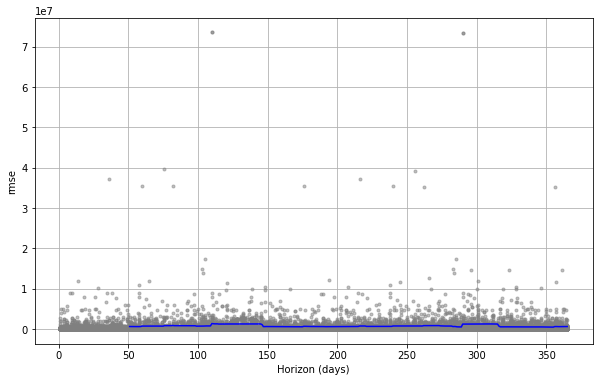

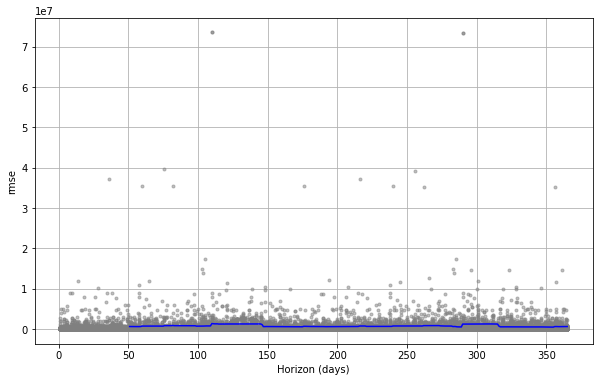

In [ ]:
plot_cross_validation_metric(CV,metric='rmse')

**Working with Non Stationary Data**
# **Modeling Holidays and Special Events**

In [ ]:
Model  = Prophet(interval_width=0.95, daily_seasonality=False)
Model.add_country_holidays(country_name='BD')
Model.fit(df2)

In [ ]:
Model.train_holiday_names.to_list()

["Language Martyrs' Day",
 "Mujib's birthday",
 'Independence Day',
 "Bengali New Year's Day",
 'Labor Day',
 'National Mourning Day',
 'Victory Day']

# **Make a Prediction and analyse components**

In [ ]:
#Make Prediction 
future_holydays = Model.make_future_dataframe(periods=84)
prophet_forecast_holidays = Model.predict(future_holydays)


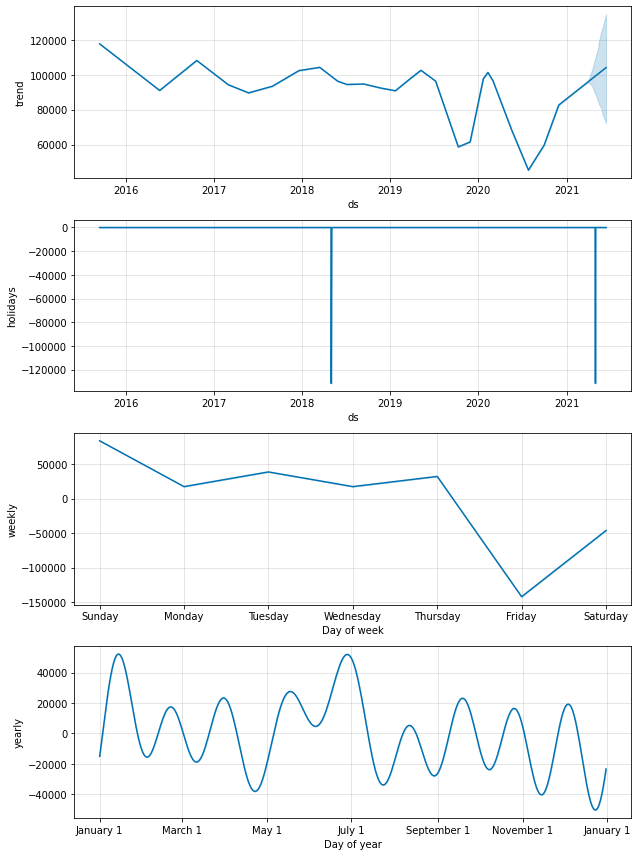

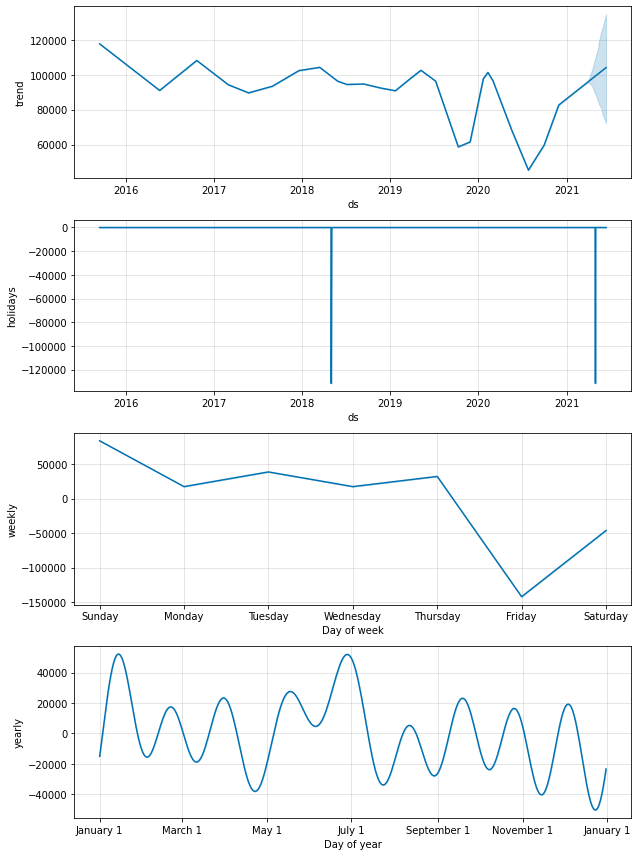

In [ ]:
#plot the model components - difficults to see with holidays 
Model.plot_components(prophet_forecast_holidays)

# **Plot an individual components **

In [ ]:
from fbprophet.plot import plot_forecast_component

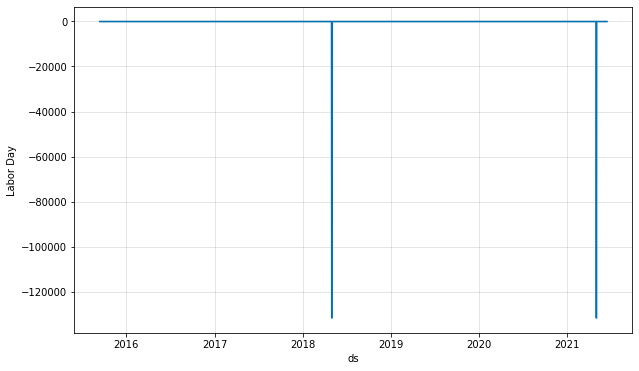

In [ ]:
plot_forecast_component(Model,prophet_forecast_holidays,'Labor Day')